<a href="https://colab.research.google.com/github/recabet/Network-Algorithms-with-NetworkX/blob/main/Network_Algorithms_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Graph representation using Python and NetworkX**


**Team members:**

Ayan Ismayilova

Farida Shakikhanli

Javid Sadigli

Rajab Iskandarli


---

# **Introduction**

  This project aims to analyze and represent network data using graph theory concepts and Python programming language, primarily utilizing the NetworkX library. The dataset used for this project is obtained from [source link](https://www.kaggle.com/datasets/vigneshvenkateswaran/bot-iot). The project is divided into several parts, each focusing on different aspects of data representation, visualization, and analysis using graph theory techniques.



---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from tabulate import tabulate
import random
import copy
from IPython.display import display, HTML




---


# **Part 1: Data Exploration**


---


**1.1 Read the dataset file from the CSV files**

The initial step involves importing the required libraries, familiarizing ourselves with the dataset and cleaning the data. That included acquiring a brief overview of the DataFrame, producing descriptive statistics using, tallying the total count of absent values in each column, and inspecting the data types of each column through pandas methods.


In [ ]:
df = pd.read_csv("data_1.csv")
df.head()

<ipython-input-87-dfb417bcabe6>:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data_1.csv")


pkSeqID         stime flgs proto            saddr  sport           daddr  \
0        1  1.526344e+09    e   arp    192.168.100.1    NaN   192.168.100.3   
1        2  1.526344e+09    e   tcp    192.168.100.7    139   192.168.100.4   
2        3  1.526344e+09    e   udp  192.168.100.149  51838  27.124.125.250   
3        4  1.526344e+09    e   arp    192.168.100.4    NaN   192.168.100.7   
4        5  1.526344e+09    e   udp   192.168.100.27  58999   192.168.100.1   

   dport  pkts  bytes  ... spkts  dpkts  sbytes  dbytes       rate     srate  \
0    NaN     4    240  ...     2      2     120     120   0.002508  0.000836   
1  36390    10    680  ...     5      5     350     330   0.006190  0.002751   
2    123     2    180  ...     1      1      90      90  20.590960  0.000000   
3    NaN    10    510  ...     5      5     210     300   0.006189  0.002751   
4     53     4    630  ...     2      2     174     456   0.005264  0.001755   

      drate  attack  category  subcategory   
0  0.000836       0    Normal        Normal  
1  0.002751       0    Normal        Normal  
2  0.000000       0    Normal        Normal  
3  0.002751       0    Normal        Normal  
4  0.001755       0    Normal        Normal  

[5 rows x 35 columns]

In [ ]:
df.dtypes

pkSeqID           int64
stime           float64
flgs             object
proto            object
saddr            object
sport            object
daddr            object
dport            object
pkts              int64
bytes             int64
state            object
ltime           float64
seq               int64
dur             float64
mean            float64
stddev          float64
smac            float64
dmac            float64
sum             float64
min             float64
max             float64
soui            float64
doui            float64
sco             float64
dco             float64
spkts             int64
dpkts             int64
sbytes            int64
dbytes            int64
rate            float64
srate           float64
drate           float64
attack            int64
category         object
subcategory      object
dtype: object

In [ ]:
df.describe()

pkSeqID         stime            pkts         bytes  \
count  1000000.000000  1.000000e+06  1000000.000000  1.000000e+06   
mean    500000.500000  1.526826e+09        8.025125  5.156971e+03   
std     288675.278932  1.940616e+05      494.350757  4.781051e+05   
min          1.000000  1.526344e+09        1.000000  6.000000e+01   
25%     250000.750000  1.526881e+09        2.000000  1.200000e+02   
50%     500000.500000  1.526899e+09        2.000000  1.200000e+02   
75%     750000.250000  1.526899e+09        2.000000  1.200000e+02   
max    1000000.000000  1.526949e+09    72700.000000  7.351081e+07   

              ltime             seq             dur            mean  \
count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000   
mean   1.526826e+09    98125.347005        1.906129        0.035261   
std    1.940582e+05    85446.184445       41.992245        0.203744   
min    1.526344e+09        1.000000        0.000000        0.000000   
25%    1.526881e+09    15573.000000        0.000207        0.000200   
50%    1.526899e+09    81392.000000        0.012066        0.011737   
75%    1.526899e+09   164726.000000        0.035779        0.035538   
max    1.526950e+09   283299.000000     1940.859253        4.968881   

               stddev  smac  ...  sco  dco           spkts           dpkts  \
count  1000000.000000   0.0  ...  0.0  0.0  1000000.000000  1000000.000000   
mean         0.003090   NaN  ...  NaN  NaN        5.393684        2.631441   
std          0.076291   NaN  ...  NaN  NaN      331.263622      212.018190   
min          0.000000   NaN  ...  NaN  NaN        0.000000        0.000000   
25%          0.000000   NaN  ...  NaN  NaN        1.000000        1.000000   
50%          0.000000   NaN  ...  NaN  NaN        1.000000        1.000000   
75%          0.000000   NaN  ...  NaN  NaN        1.000000        1.000000   
max          2.499505   NaN  ...  NaN  NaN    38081.000000    36350.000000   

             sbytes        dbytes          rate           srate  \
count  1.000000e+06  1.000000e+06  1.000000e+06  1000000.000000   
mean   3.539547e+03  1.617424e+03  6.539687e+03      232.299716   
std    3.054851e+05  2.120604e+05  3.353803e+04     2971.115068   
min    0.000000e+00  0.000000e+00  0.000000e+00        0.000000   
25%    6.000000e+01  6.000000e+01  2.475186e+01        0.000000   
50%    6.000000e+01  6.000000e+01  5.368839e+01        0.000000   
75%    6.000000e+01  6.000000e+01  1.508296e+03        0.000000   
max    3.774702e+07  3.695876e+07  1.250000e+06  1000000.000000   

                drate          attack  
count  1000000.000000  1000000.000000  
mean       214.119254        0.998007  
std       2145.511374        0.044599  
min          0.000000        0.000000  
25%          0.000000        1.000000  
50%          0.000000        1.000000  
75%          0.000000        1.000000  
max     500000.000000        1.000000  

[8 rows x 26 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   pkSeqID       1000000 non-null  int64  
 1   stime         1000000 non-null  float64
 2   flgs          1000000 non-null  object 
 3   proto         1000000 non-null  object 
 4   saddr         1000000 non-null  object 
 5   sport         999513 non-null   object 
 6   daddr         1000000 non-null  object 
 7   dport         999513 non-null   object 
 8   pkts          1000000 non-null  int64  
 9   bytes         1000000 non-null  int64  
 10  state         1000000 non-null  object 
 11  ltime         1000000 non-null  float64
 12  seq           1000000 non-null  int64  
 13  dur           1000000 non-null  float64
 14  mean          1000000 non-null  float64
 15  stddev        1000000 non-null  float64
 16  smac          0 non-null        float64
 17  dmac          0 non-null    

In [ ]:
df.isnull().sum()

pkSeqID               0
stime                 0
flgs                  0
proto                 0
saddr                 0
sport               487
daddr                 0
dport               487
pkts                  0
bytes                 0
state                 0
ltime                 0
seq                   0
dur                   0
mean                  0
stddev                0
smac            1000000
dmac            1000000
sum                   0
min                   0
max                   0
soui            1000000
doui            1000000
sco             1000000
dco             1000000
spkts                 0
dpkts                 0
sbytes                0
dbytes                0
rate                  0
srate                 0
drate                 0
attack                0
category              0
subcategory           0
dtype: int64

After meticulously analyzing the occurrence of null values, the decision was made to remove empty columns and eliminate rows with null values in the 'sport' and 'dport' columns. This action was taken because these rows were deemed impractical without information about both 'dport' (destination port) and 'sport' (source port).

In [ ]:
df.drop(['smac', 'dmac', 'soui', 'doui', 'sco','dco'], axis=1, inplace=True)
df.dropna(subset=['sport', 'dport'], inplace=True)
df.isnull().sum()

pkSeqID         0
stime           0
flgs            0
proto           0
saddr           0
sport           0
daddr           0
dport           0
pkts            0
bytes           0
state           0
ltime           0
seq             0
dur             0
mean            0
stddev          0
sum             0
min             0
max             0
spkts           0
dpkts           0
sbytes          0
dbytes          0
rate            0
srate           0
drate           0
attack          0
category        0
subcategory     0
dtype: int64



---


Subsequently, mismatches in the data types of columns were explored, and uniformity was ensured by converting them appropriately.

In [ ]:
unique_data_types_per_column = {}
for column in df.columns:
    unique_data_types = df[column].apply(type).unique()
    unique_data_types_per_column[column] = unique_data_types

for column, data_types in unique_data_types_per_column.items():
    print(f"Column '{column}' has data types: {data_types}")


Column 'pkSeqID' has data types: [<class 'int'>]
Column 'stime' has data types: [<class 'float'>]
Column 'flgs' has data types: [<class 'str'>]
Column 'proto' has data types: [<class 'str'>]
Column 'saddr' has data types: [<class 'str'>]
Column 'sport' has data types: [<class 'str'> <class 'float'> <class 'int'>]
Column 'daddr' has data types: [<class 'str'>]
Column 'dport' has data types: [<class 'str'> <class 'float'> <class 'int'>]
Column 'pkts' has data types: [<class 'int'>]
Column 'bytes' has data types: [<class 'int'>]
Column 'state' has data types: [<class 'str'>]
Column 'ltime' has data types: [<class 'float'>]
Column 'seq' has data types: [<class 'int'>]
Column 'dur' has data types: [<class 'float'>]
Column 'mean' has data types: [<class 'float'>]
Column 'stddev' has data types: [<class 'float'>]
Column 'sum' has data types: [<class 'float'>]
Column 'min' has data types: [<class 'float'>]
Column 'max' has data types: [<class 'float'>]
Column 'spkts' has data types: [<class 'i

The "sport" and "dport" columns in the dataset exhibited mixed types and formats, including integers, strings, and hexadecimal formats. To ensure uniformity, all values in these columns were converted to strings. This step resolved potential data type mismatches and inconsistencies.

In [ ]:
def convert_to_int(value):
    try:
        if isinstance(value, str) and value.startswith('0x'):
            return int(value, 16)
        elif isinstance(value, str) and value.isdigit():
            return int(value)
        elif isinstance(value, float):
            return int(value)
        else:
            raise ValueError("Conversion to integer not possible")
    except ValueError:
        return value

df['sport'] = df['sport'].apply(convert_to_int)
df['dport'] = df['dport'].apply(convert_to_int)


print("Values impossible to convert to int in 'sport' column:")
print(df['sport'][~df['sport'].apply(lambda x: isinstance(x, int))].unique())

print("Values impossible to convert to int in 'dport' column:")
print(df['dport'][~df['dport'].apply(lambda x: isinstance(x, int))].unique())


Values impossible to convert to int in 'sport' column:
['xinetd']
Values impossible to convert to int in 'dport' column:
['nut']


In [ ]:
df = df.drop(df[(df['sport'] == 'xinetd') | (df['dport'] == 'nut')].index)
try:
    df['sport'] = df['sport'].astype(str)
except:
    raise Exception("Error converting values in 'sport' column to string")

try:
    df['dport'] = df['dport'].astype(str)
except:
    raise Exception("Error converting values in 'dport' column to string")

Uniformity of data types were confirmed:

In [ ]:
unique_data_types_per_column = {}
for column in df.columns:
    unique_data_types = df[column].apply(type).unique()
    unique_data_types_per_column[column] = unique_data_types

for column, data_types in unique_data_types_per_column.items():
    print(f"Column '{column}' has data types: {data_types}")

Column 'pkSeqID' has data types: [<class 'int'>]
Column 'stime' has data types: [<class 'float'>]
Column 'flgs' has data types: [<class 'str'>]
Column 'proto' has data types: [<class 'str'>]
Column 'saddr' has data types: [<class 'str'>]
Column 'sport' has data types: [<class 'str'>]
Column 'daddr' has data types: [<class 'str'>]
Column 'dport' has data types: [<class 'str'>]
Column 'pkts' has data types: [<class 'int'>]
Column 'bytes' has data types: [<class 'int'>]
Column 'state' has data types: [<class 'str'>]
Column 'ltime' has data types: [<class 'float'>]
Column 'seq' has data types: [<class 'int'>]
Column 'dur' has data types: [<class 'float'>]
Column 'mean' has data types: [<class 'float'>]
Column 'stddev' has data types: [<class 'float'>]
Column 'sum' has data types: [<class 'float'>]
Column 'min' has data types: [<class 'float'>]
Column 'max' has data types: [<class 'float'>]
Column 'spkts' has data types: [<class 'int'>]
Column 'dpkts' has data types: [<class 'int'>]
Column 



---

**1.2 Describe each attribute in the dataset in the simplest way.**

The Excel file 'Total Feature Description.xlsx' contains columns with information about features and their descriptions. Each row represents a feature, and the columns include attributes such as feature names and their corresponding descriptions.



In [ ]:
df_feature_description = pd.read_excel('Total Feature Description.xlsx')
table_data = df_feature_description.values.tolist()
headers = df_feature_description.columns.tolist()
tabulated_features = tabulate(table_data, headers=headers, tablefmt='html')
display(HTML(tabulated_features))



---


**1.3 Describe the relations between the attributes.**

The correlation matrix was calculated to quantify the relationships between attributes. The correlation matrix contains correlation coefficients between pairs of attributes, ranging from -1 to 1.

Using the correlation matrix, a heatmap was generated to visualize the correlations between attributes. Each cell in the heatmap represents the correlation coefficient between two attributes.

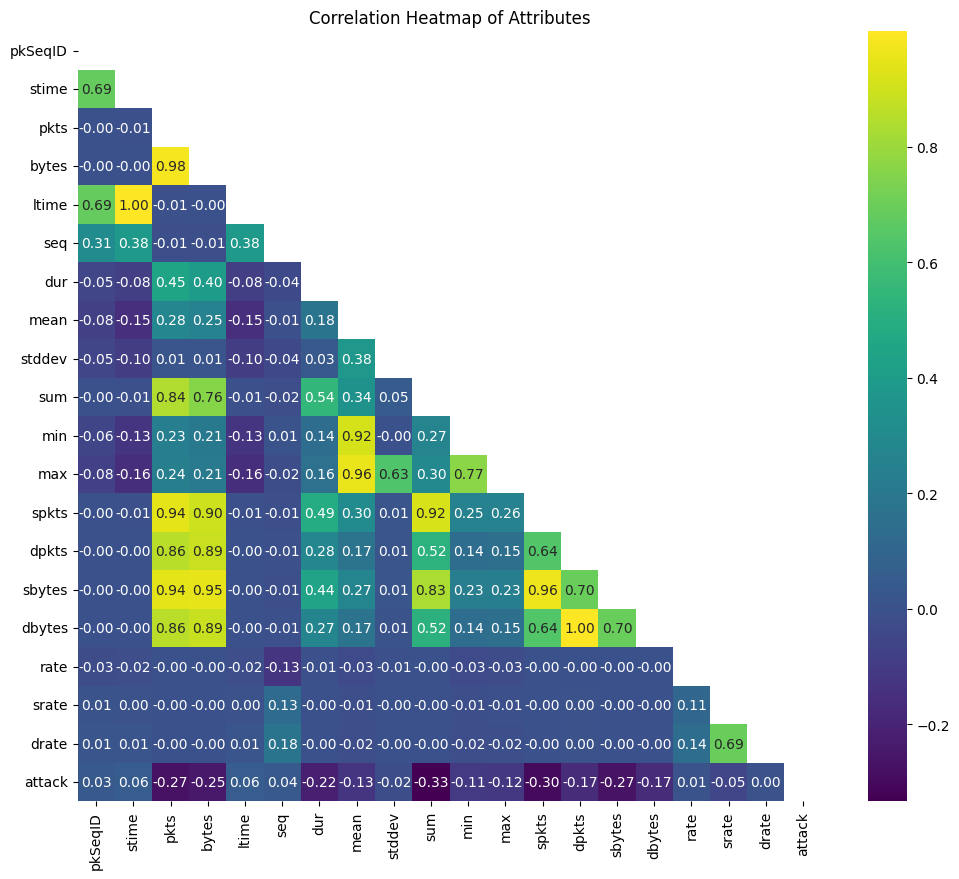

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,mask=mask, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Attributes')

plt.show()

The **'Total Count of Packets'** (pkts), **'Total Number of Bytes'** (bytes) , **'Source-to-Destination Packet Count'** (spkts), and **'Source-to-Destination Byte Count'** (sbytes) exhibit strong positive correlations among themselves, indicating a linear relationship in the number and size of packets and bytes transferred.

The **'Total Duration of Aggregated Records'** (sum) shows moderate positive correlations with **'Source-to-Destination Packet Count'** (spkts), **'Source-to-Destination Byte Count'** (sbytes), and **'Total Number of Bytes'** (bytes), indicating a relationship between the total duration and the number and size of packets and bytes transferred.

The **'Destination-to-Source Packet Count'** (dpkts) feature demonstrates strong positive correlations with **'Destination-to-Source Byte Count'** (dbytes) and **'Total Count of Packets'** (pkts), indicating a linear relationship between the number of packets sent and received.


---







**1.4 Use statistical tools to represent the data using charts and other tools.**

The distribution of categorical features within the dataset were represented using histograms.

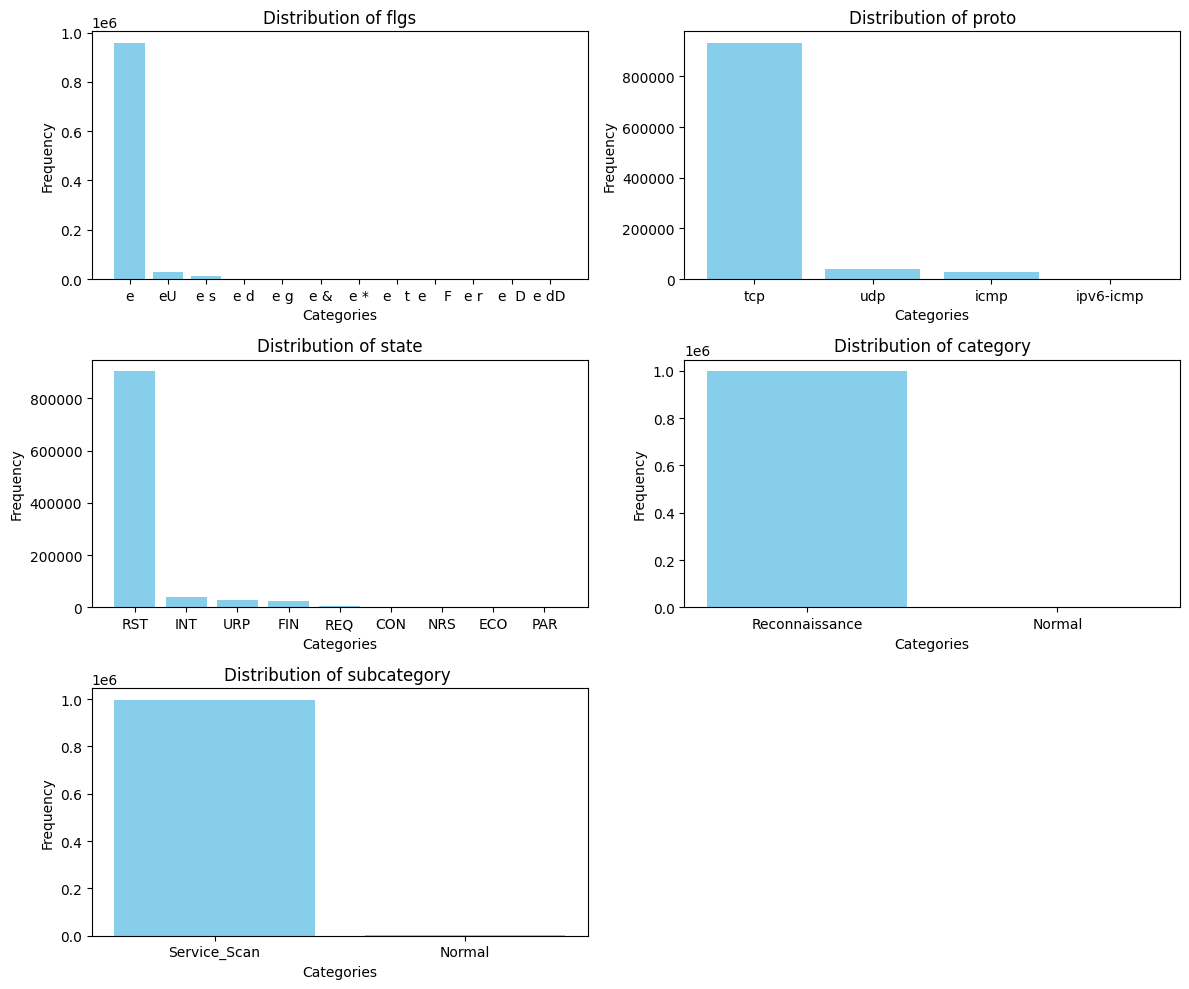

In [ ]:
categorical_features = ['flgs', 'proto', 'state', 'category', 'subcategory ']

num_cols = 2
num_rows = (len(categorical_features) + 1) // num_cols
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    feature_counts = df[feature].value_counts()
    axs[i].bar(feature_counts.index, feature_counts.values, color='skyblue')
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Frequency')

for j in range(len(categorical_features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()




---


Previously identified correlations were visualized through scatter plots, allowing for a more intuitive exploration of the relationships between different variables in the dataset.

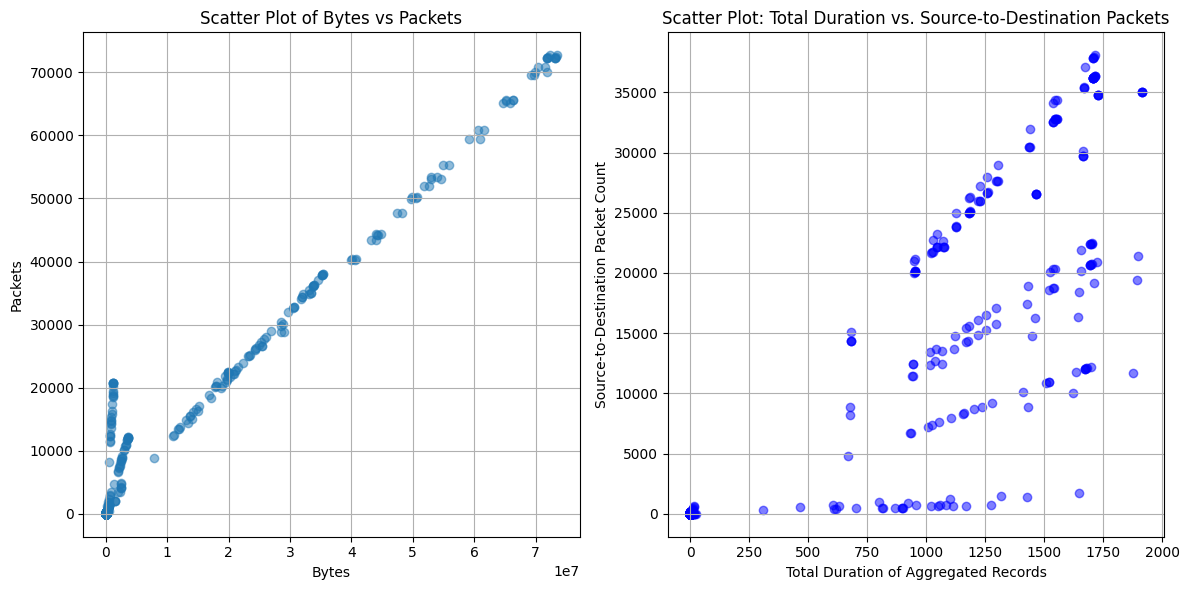

In [ ]:
bytes_data = df['bytes']
pkts_data = df['pkts']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(bytes_data, pkts_data, alpha=0.5)
plt.xlabel('Bytes')
plt.ylabel('Packets')
plt.title('Scatter Plot of Bytes vs Packets')
plt.grid(True)


total_duration = df['sum']
source_to_destination_packets = df['spkts']

plt.subplot(1, 2, 2)
plt.scatter(total_duration, source_to_destination_packets, alpha=0.5, color='blue')
plt.title('Scatter Plot: Total Duration vs. Source-to-Destination Packets')
plt.xlabel('Total Duration of Aggregated Records')
plt.ylabel('Source-to-Destination Packet Count')
plt.grid(True)

plt.tight_layout()
plt.show()




---


The dataset was sorted based on the 'saddr' (source address) column to consolidate complete information for each source address, rather than having incomplete data scattered across multiple addresses. Although sorting temporarily reduced the diversity of source addresses, it enhanced the data's usability and interpretability by establishing a more coherent and organized structure.

Following sorting, a subset of the data comprising 400,000 records was created. This subset enabled working with a manageable portion of the dataset, thereby reducing computational complexity and enhancing processing efficiency, while still preserving a representative sample of the original data for analysis.







In [ ]:
file_path = 'cleaned_data.csv'
df.to_csv(file_path, index=False)
print("Cleaned dataset saved succesfully.")

Cleaned dataset saved succesfully.


In [ ]:
sorted_df = df.sort_values(by='saddr')
subset_df = df.head(400000)
file_path = 'subset_data.csv'
subset_df.to_csv(file_path, index=False)
print("Subset data saved successfully.")

Subset data saved successfully.




---


# **Part** **2**


---

**2.5 Using your experience from the lab session and the lab networkx, present the data in a graph format using:**

Moving forward, we will conduct our analyses on a subset of the data in order to optimize computational efficiency and enhance visualization clarity.


In [ ]:
df = pd.read_csv('subset_data.csv')

**a. First representation uses “IP” as a node and an event as edges.**

This section constructed a graph representing network connections based on IP addresses. It started by initializing an empty graph and then iterated through each row of the dataset. For each row, it identified the source and destination IP addresses and added them as nodes to the graph. Edges were created between these nodes to depict communication paths. The graph was then visualized using a spring layout algorithm that minimized overlapping and optimized the overall layout for better visualization.

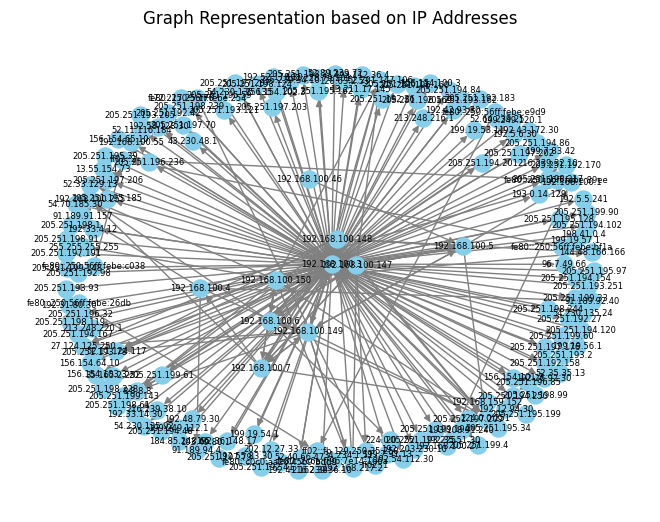

In [ ]:
def create_ip_graph(data_frame):

    graph=nx.from_pandas_edgelist(data_frame, source="saddr",target="daddr",create_using=nx.DiGraph())

    return graph

# Visualize the graph
ip_graph=create_ip_graph(df)
pos = nx.spring_layout(ip_graph, k=1)
nx.draw(ip_graph, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_weight='normal', edge_color='gray', width=1)
plt.title('Graph Representation based on IP Addresses')
plt.show()


**b. Second representation uses event (row) as a node.**

  For convenience, it was visualized on 50 rows (events). Each event had a node added to the graph. Then, other events with the same category were checked for, and they were connected with edges to represent their relationship. Finally, this graph was visualized, showing the connections between events of the same category.

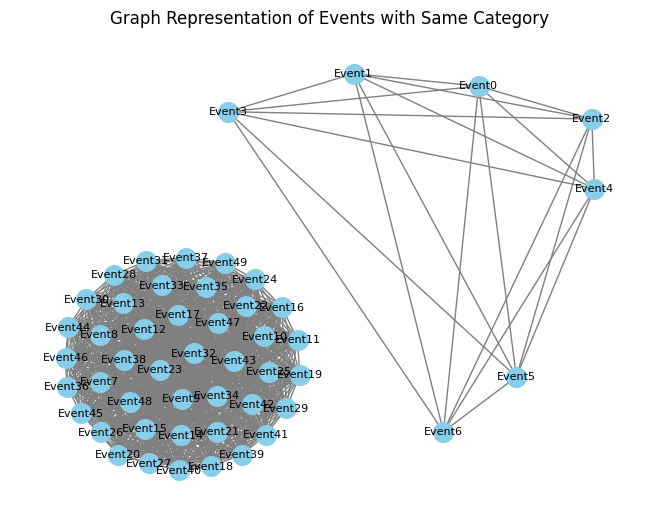

In [ ]:
# Select a portion of the dataframe (e.g., first 50 rows)
portion_df = df.head(50)

def create_event_graph_category_edge(data_frame):
    # Create an empty graph
    graph = nx.Graph()

    # Iterate over each row in the dataset
    for index, row in data_frame.iterrows():
        # Add event node
        event_node = 'Event{}'.format(index)
        graph.add_node(event_node)

        # Get category of the event
        category = row['category']

        # Check if category is not null
        if pd.notnull(category):
            # Check if there's any other event with the same category
            same_category_events = data_frame[portion_df['category'] == category]
            for _, other_row in same_category_events.iterrows():
                other_event_node = 'Event{}'.format(other_row.name)
                if event_node != other_event_node:  # Avoid self-loops
                    # Add edge between events with the same category
                    graph.add_edge(event_node, other_event_node)

    return graph


# Visualize the graph
event_graph=create_event_graph_category_edge(portion_df)
pos = nx.spring_layout(event_graph, k=1)
nx.draw(event_graph, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_weight='normal', edge_color='gray', width=1)
plt.title('Graph Representation of Events with Same Category')
plt.show()


**c. Third representation uses any attribute that you decide as a node.**

For each row in the dataset, the source port (sport) and destination port (dport) were extracted. These ports were then added as nodes to the directed graph. Subsequently, directed edges were added from the source ports to the destination ports, indicating the direction of communication.

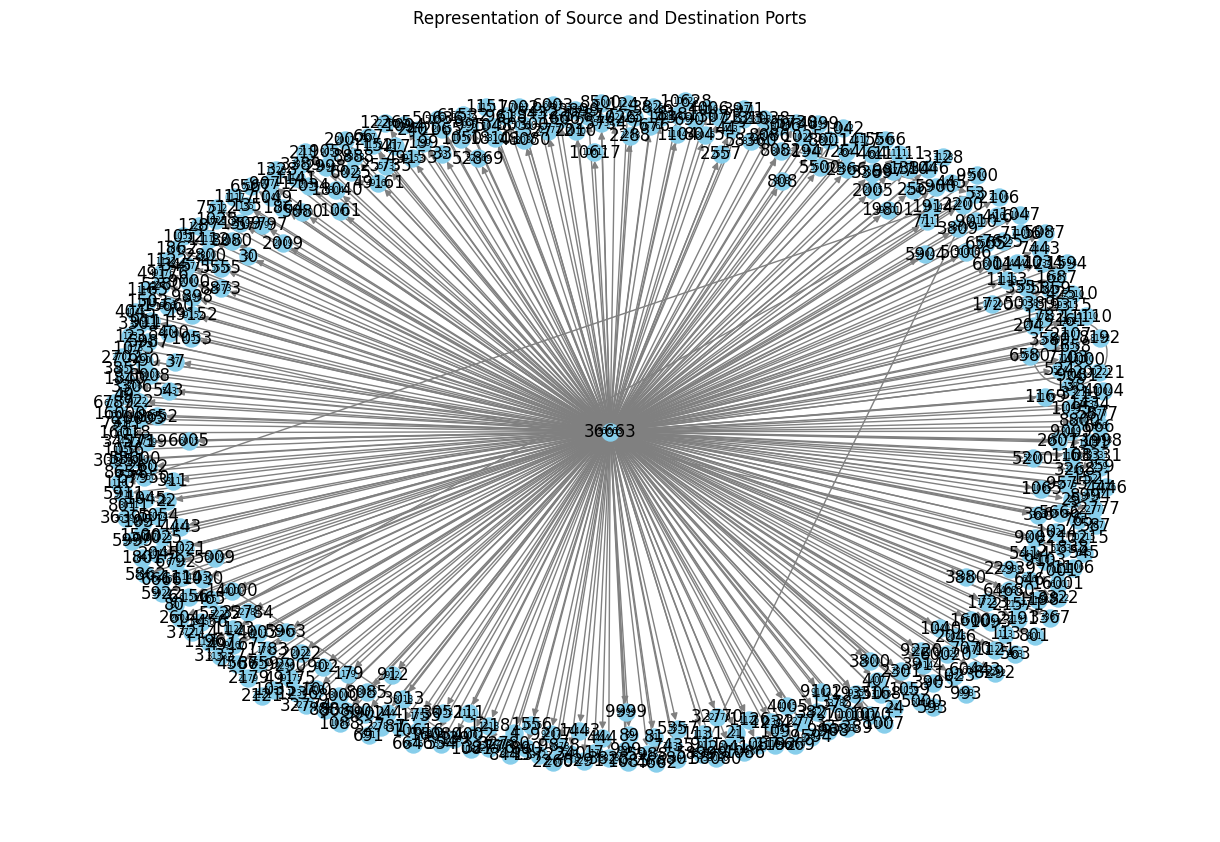

In [ ]:
# Select a portion of the dataframe (e.g., first 400 rows)
portion_df = df.head(400)


def create_port_graph(data_frame):
    # Create an empty directed graph
    graph = nx.MultiDiGraph()

    # Iterate over each row in the dataset
    for index, row in data_frame.iterrows():
        # Get source port and destination port
        source_port = row['sport']
        dest_port = row['dport']

        # Add source and destination ports as nodes to the graph
        graph.add_node(source_port, label=source_port)
        graph.add_node(dest_port, label=dest_port)

        # Add directed edge from source to destination port
        graph.add_edge(source_port, dest_port)
    return graph

# Visualize the graph
port_graph=create_port_graph(portion_df)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(port_graph, k=1)
nx.draw(port_graph, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_weight='normal', edge_color='gray', width=1)
node_labels = nx.get_node_attributes(port_graph, 'label')
nx.draw_networkx_labels(port_graph, pos, labels=node_labels)
plt.title('Representation of Source and Destination Ports')
plt.show()




---



**2.6 Automate the process of representation using graphs to let users decide which attribute as node and which
attribute as edges.**

For this task, a Python function named create_graph was developed to automate the process of graph representation using NetworkX, allowing users to determine which attributes serve as nodes and edges within the graph. This function provides flexibility in constructing graphs from DataFrame containing network data.

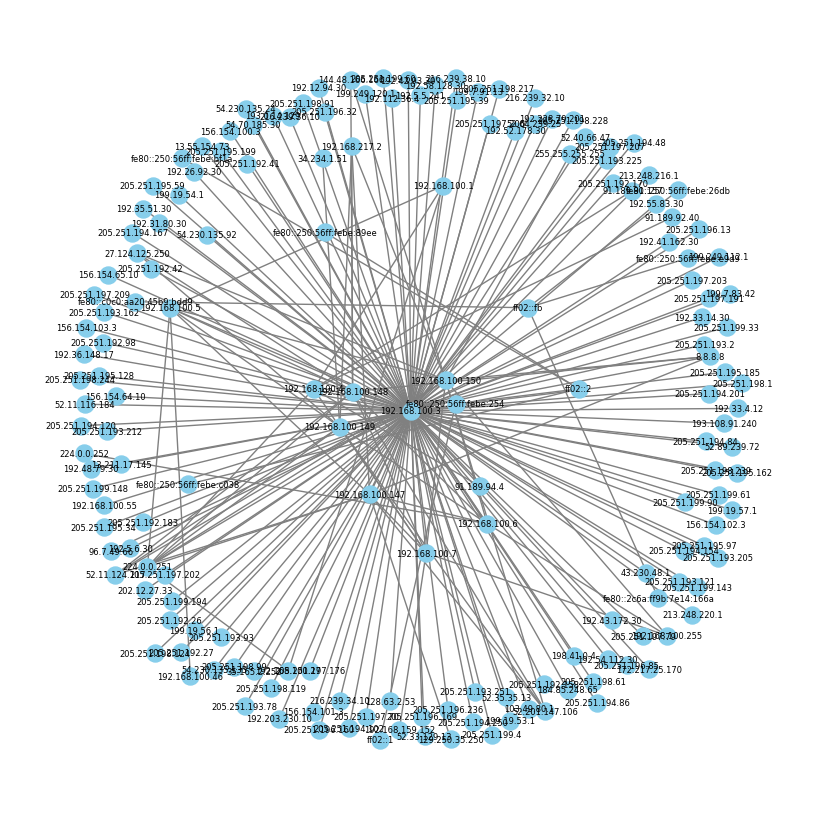

In [ ]:
def create_graph(dataframe, source_nodes, destination_nodes=None, edge_attr=None, DiGraph=False, MultiGraph=False):
    """
    Create a graph from a DataFrame with specified source and destination nodes.

    Parameters:
        dataframe (DataFrame): The DataFrame containing edge information.
        source_nodes (str or list): The column name(s) containing the source node(s).
        destination_nodes (str or list, optional): The column name(s) containing the destination node(s).
        edge_attr (str or list, optional): The column name(s) containing edge attributes.
        DiGraph (bool, optional): If True, create a directed graph (DiGraph).
        MultiGraph (bool, optional): If True, create a MultiGraph. If both DiGraph and MultiGraph are True, create a MultiDiGraph.
                                     If DiGraph is False and MultiGraph is True, create a regular MultiGraph.

    Returns:
        graph: A NetworkX graph.
    """
    # Create an empty graph
    if DiGraph and MultiGraph:
        graph = nx.MultiDiGraph()
    elif MultiGraph:
        graph = nx.MultiGraph()
    elif DiGraph:
        graph = nx.DiGraph()
    else:
        graph = nx.Graph()

    # Add edges with optional attributes
    for index, row in dataframe.iterrows():
        source = row[source_nodes] if isinstance(source_nodes, str) else tuple(row[source_nodes])

        if destination_nodes:
            destination = row[destination_nodes] if isinstance(destination_nodes, str) else tuple(row[destination_nodes])
        else:
            destination = None

        if edge_attr:
            attrs = {attr: row[attr] for attr in edge_attr}
            if destination:
                graph.add_edge(source, destination, **attrs)
            else:
                graph.add_node(source, **attrs)
        else:
            if destination:
                graph.add_edge(source, destination)
            else:
                graph.add_node(source)

    return graph


# Example usage:
graph = create_graph(df, 'saddr', 'daddr', edge_attr=['proto', 'flgs', 'pkts'])
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=1)
nx.draw(graph, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_weight='normal', edge_color='gray', width=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()




---


# **Part** **3**


---
In this section, a function was developed to implement an algorithm for finding a path between a given source and destination within the network graph.

**3.7 Use the plot of the graph to visualize pathes**

Initially, emphasis was placed on the creation of a visualization function, which highlighted the discovered path by marking it in red within the graph representation. The function was created ***to be utilized in the next part (3.8)***, implementing an algorithm for finding a path between a given source and destination within the network graph.

In [ ]:
def visualize_paths(path, graph):
    # Create a deep copy of the original graph
    highlighted_graph = copy.deepcopy(graph)

    # Add edge attribute 'color' to all edges with default value 'gray'
    for u, v in highlighted_graph.edges():
        highlighted_graph[u][v]['color'] = 'gray'

    # Update the color of edges in the specified paths to 'red'
        for i in range(len(path) - 1):
            u, v = path[i], path[i+1]
            if highlighted_graph.has_edge(u, v):
                highlighted_graph.add_edge(u, v, color='red')  # Add edge with 'color' attribute
            else:
                print(f"Edge between {u} and {v} does not exist in the graph.")

    # Draw the graph with edges colored according to their 'color' attribute
    edge_colors = [highlighted_graph[u][v]['color'] for u, v in highlighted_graph.edges()]
    pos = nx.spring_layout(graph, k=1)
    nx.draw(highlighted_graph, pos, with_labels=True, node_size=150, node_color='skyblue', font_size=6, font_weight='normal', edge_color=edge_colors)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()




---


**3.8 Create a function to find anyone's path from a given origin to a given destiny (not supposed to be optimal)**

After the creation of the visualization function, a subsequent step involved implementing a function that utilizes Depth First Search (DFS) to find a path between a given source and destination within the network graph. This function was designed to return the path as a list of strings, allowing for wider applicability and ease of interpretation in subsequent analysis.

In [ ]:
def depth_first_navigation(origin: str, destination: str, Graph, visited=None):
    if visited is None:
        visited = set()
    visited.add(origin)

    if origin == destination:
        return [origin]

    for neighbor in Graph.neighbors(origin):
        if neighbor not in visited:
            path = depth_first_navigation(neighbor, destination, Graph, visited.copy())
            if path is not None:
                return [origin] + path

In [ ]:
origin_node = '192.168.100.46'
destination_node = '205.251.194.167'
path = depth_first_navigation(origin_node , destination_node, graph)
print(f"Path from node {origin_node} to node {destination_node}: {path}")

Path from node 192.168.100.46 to node 205.251.194.167: ['192.168.100.46', '192.168.100.5', '192.168.100.3', '205.251.194.167']


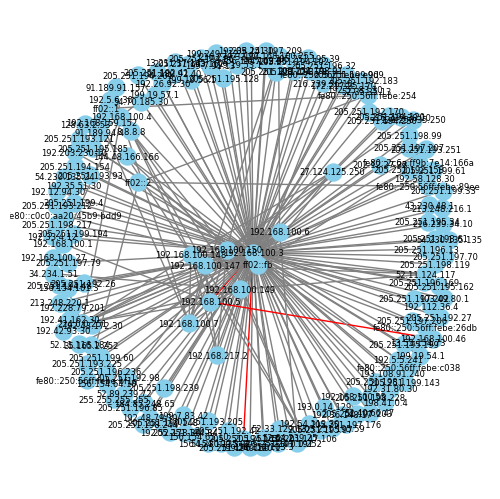

In [ ]:
#'path' is a list of strings representing the path in the graph
visualize_paths(path, graph)



---


**3.9 Create a function to evaluate how many packets were sent using a path between IPs. Verify this by comparing
your results to different implementations of the path function.**

 A function, named "packets," was created to evaluate the number of packets sent between specified source and destination nodes along a given path within a network graph. The function was developed to calculate the total packet count by iterating through relevant rows in the dataset and summing the packet counts for each corresponding edge in the provided path.

In [ ]:
def packets(source_attribute, destination_attribute, path):
    total_pkts = 0
    i = 0
    if path==None:
        raise TypeError
    for index, row in df.iterrows():
        if row[source_attribute] == path[i] and row[destination_attribute] == path[i+1]:
            total_pkts += row["pkts"]
            i += 1
    return total_pkts

origin_node = "192.168.100.46"
destination_node = "205.251.194.167"
path = depth_first_navigation(origin_node, destination_node, graph)
total_packets = packets('saddr', 'daddr', path)
print(f"Total packets sent from node {origin_node} to node {destination_node}: {total_packets}")


Total packets sent from node 192.168.100.46 to node 205.251.194.167: 48159




---


# **Part** **4**


---



**4.10 Use colors to the plot to represent differences between protocols.**

A function was developed to enhance the visualization of network graphs by assigning different colors to paths based on their protocol type. The function visualize_protocol_differences first identifies the unique protocols present in the graph's edges. Then, it assigns a distinct color to each protocol type using a predefined color map. Next, it generates a list of colors for each edge based on its associated protocol. The graph is then visualized with colored edges, where each color represents a specific protocol.

In [ ]:
def visualize_protocol_differences(graph):
    # Define color mapping for each unique protocol
    unique_protocols = set([data['proto'] for u, v, data in graph.edges(data=True)])
    protocol_colors = {protocol: plt.cm.tab10(i) for i, protocol in enumerate(unique_protocols)}

    # Create a list of colors for each edge based on its protocol
    edge_colors = [protocol_colors[data['proto']] for u, v, data in graph.edges(data=True)]

    # Visualize the graph with colored edges based on protocols
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, k=0.5)
    legend_handles = [plt.Line2D([], [], color=color, label=protocol) for protocol, color in protocol_colors.items()]
    plt.legend(handles=legend_handles)
    nx.draw(graph, pos=pos, with_labels=True, node_color='lightblue', node_size=150, edge_color=edge_colors, font_size=6, font_color='black')
    plt.title('Colored Edges Based on Protocols')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

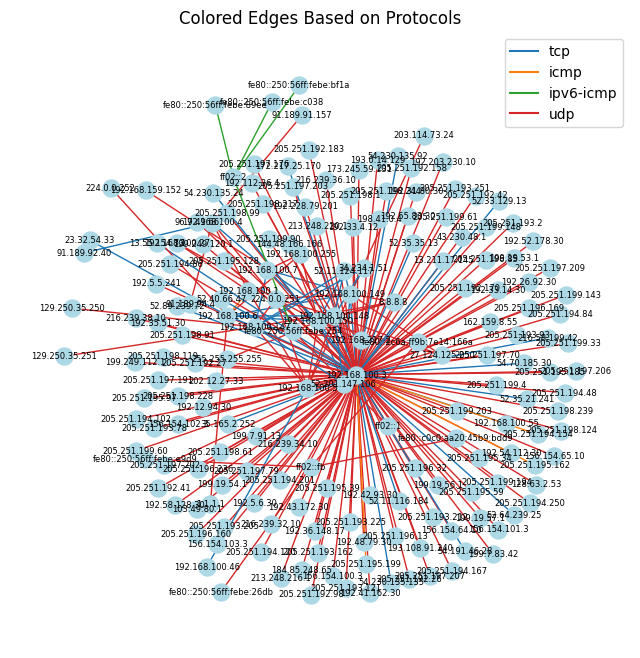

In [ ]:
visualize_protocol_differences(graph)



---


**4.11 Automate the coloring so the user can choose the attribute and then the representation color based on the
difference between values.**

The previous function, has been enhanced to accommodate a user's desired attribute, making it more versatile.

In [ ]:
def visualize_attribute_differences(graph, attribute, colormap='viridis'):
    # Define color mapping for each unique attribute value
    unique_attributes = set([data[attribute] for u, v, data in graph.edges(data=True)])
    attribute_colors = {attribute: plt.cm.tab10(i) for i, attribute in enumerate(unique_attributes)}

    edge_colors = [attribute_colors[data[attribute]] for u, v, data in graph.edges(data=True)]

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph, k=0.5)
    legend_handles = [plt.Line2D([], [], color=color, label=f'{attribute}') for protocol, color in attribute_colors.items()]
    plt.legend(handles=legend_handles)
    nx.draw(graph, pos=pos, with_labels=True, node_color='lightblue', node_size=150, edge_color=edge_colors, font_size=6, font_color='black')
    plt.title(f'Colored Edges Based on {attribute}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

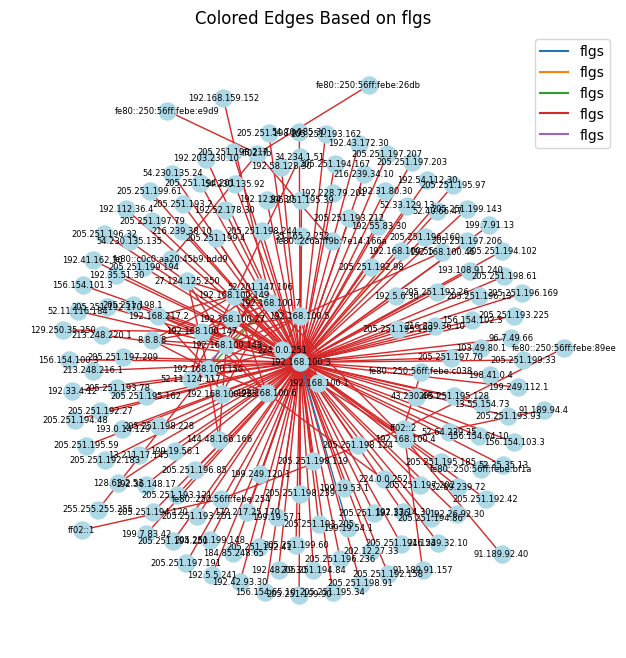

In [ ]:
visualize_attribute_differences(graph,'flgs')



---


# **Part** **5**


---



A new graph was generated utilizing the entirety of the cleaned dataset.

In [ ]:
df = pd.read_csv('cleaned_data.csv')
graph = create_graph(df, 'saddr', 'daddr', DiGraph=True, MultiGraph =True)



---


**a. Degree Connectivity**

Degree connectivity in a graph refers to the degree of connectivity between nodes within the graph. It quantifies the extent to which nodes are connected to each other through their adjacent edges. The average degree connectivity is the average nearest neighbor degree of nodes with degree k. For a directed graph, the average degree is simply the number of edges divided by the number vertices.


In [ ]:
def degree_connectivity_avg(graph):
    return graph.number_of_edges()/graph.number_of_nodes()

In [ ]:
def degree_connectivity_for_each_node(graph):
    return dict(graph.degree())

In [ ]:
degreeConnectivity = degree_connectivity_avg(graph)
print('Average degree connectivity: ', degreeConnectivity)

Average degree connectivity:  1.2


In [ ]:
degreeConnectivityDict = degree_connectivity_for_each_node(graph)
table_data = [(node, connectivity) for node, connectivity in degreeConnectivityDict.items()]

headers = ["Node", "Degree Connectivity"]
html_table = tabulate(table_data, headers=headers, tablefmt='html')
display(HTML(html_table))



---

 **b. Closeness Centrality**

Closeness Centrality of a node is the average length of the shortest path from the node to all other nodes.

In [ ]:
closenessCentrality = nx.closeness_centrality(graph)
sortedCloseness = sorted(closenessCentrality.items(), key=lambda x: x[1], reverse=True)

tabulatedCloseness = tabulate(sortedCloseness, headers=['IP address', 'Closeness Index'], tablefmt='html')
display(HTML(tabulatedCloseness))



---


 **c. Betweenness Centrality**

 Betweenness Centrality is the number of times a node is present in the shortest path between 2 other nodes.

In [ ]:
betweennessCentrality = nx.betweenness_centrality(graph)
sortedBetweenness = sorted(betweennessCentrality.items(), key=lambda x: x[1], reverse=True)

tabulatedBetweenness = tabulate(sortedBetweenness, headers=['IP address', 'Betweenness Index'], tablefmt='html')
display(HTML(tabulatedBetweenness))



---


 **d. Network Density**

 Network density is a measure of how interconnected the nodes in a graph are. It represents the proportion of edges that are present in the graph relative to the total number of possible edges. In mathematical terms, network density is calculated as the ratio of the number of edges in the graph to the total number of possible edges.

 D =
maximum possible edges /
number of edges
​


In [ ]:
density = nx.density(graph)
print(f"Network density: {density}")

Network density: 0.014201183431952662




---


**e. Network Diameter**

The network diameter is a measure of the maximum shortest path length between any pair of nodes in a graph. In other words, it represents the longest shortest path among all possible pairs of nodes in the graph.

The network diameter was found by first identifying the strongly connected components (SCCs) in the graph using the nx.strongly_connected_components() function, which returns a list of SCCs. Then, the largest SCC was determined by finding the SCC with the maximum number of nodes. Next, a subgraph was created from the largest SCC using the graph.subgraph() method. After that, the shortest path lengths between all pairs of nodes in the subgraph were calculated using the nx.all_pairs_shortest_path_length() function, which returns a dictionary where keys are source nodes and values are dictionaries of target nodes with their corresponding shortest path lengths. Finally, the diameter of the network was computed as the maximum shortest path length among all pairs of nodes in the subgraph using the max() function. The result was printed as the network diameter.

In [ ]:
stronglyConnectedComponents = list(nx.strongly_connected_components(graph))
largestSCC = max(stronglyConnectedComponents, key=len)
subgraph = graph.subgraph(largestSCC)
shortestPathLengths = dict(nx.all_pairs_shortest_path_length(subgraph))
diameter = max(max(lengths.values()) for lengths in shortestPathLengths.values())
print(f"Network diameter: {diameter}")

Network diameter: 4




---


**f. Network Average Path Length**

the graph's strongly connected components were identified using **nx.strongly_connected_components()**. The largest strongly connected component was then determined by finding the set with the maximum number of nodes among the identified SCCs. A subgraph was created from this largest component using the **subgraph()** method. The average shortest path length within this subgraph was calculated using **nx.average_shortest_path_length()**. Finally, the calculated average path length was displayed to provide insights into the structure of the largest strongly connected component.







In [ ]:
stronglyConnectedComponents = list(nx.strongly_connected_components(graph))

largest_ = max(stronglyConnectedComponents, key=len)

subgraph = graph.subgraph(largestSCC)

averagePathLength = nx.average_shortest_path_length(subgraph)

print("Average Path Length:", averagePathLength)

Average Path Length: 1.6888888888888889




---

# **Conclusion**

In our exploration of the UNSW IoT Botnet Dataset, our team performed a comprehensive analysis aimed at unraveling the intricacies of network behavior. Leveraging three distinct files, each containing one million rows of data, we delved into the granular details encapsulated within the dataset. Through the adept utilization of Python libraries such as pandas, numpy, and networkx, we meticulously retrieved, described, and statistically analyzed the data, shedding light on fundamental attributes like source and destination addresses, ports, protocols, and states.

Graph construction served as a cornerstone of our analysis, allowing us to visually represent network interactions. By harnessing the capabilities of the networkx library, we created directed and multi-graphs, offering intuitive insights into the structure and dynamics of the network. Additionally, we developed custom functions for pathfinding, facilitating the determination of paths and packet counts between specified nodes.

To enhance the interpretability of our visualizations, we devised coloring strategies that represented various attributes such as protocols and states. This approach not only added depth to our analysis but also provided users with the flexibility to customize visualizations based on attribute disparities.

Transitioning to network metrics, we explored concepts such as connectivity, centrality, density, and diameter. Degree connectivity offered insights into the resilience of the network against node failures, while centrality metrics like closeness and betweenness shed light on node reachability and brokerage, respectively. Metrics like network density and diameter provided a comprehensive understanding of the overall connectivity and scale of the network.

In conclusion, our journey through the UNSW IoT Botnet Dataset has yielded valuable insights into network behavior. The findings from this project hold implications for various domains, including anomaly detection, security, and network optimization.